In [ ]:
!pip install opendatasets
!pip install pandas
!pip install geopandas
!pip install plotly==5.3.1

Kaggle --> profile --> account --> API key

In [3]:
# import required libraries
import opendatasets as od
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


In [5]:
# Load dataset
od.download("https://www.kaggle.com/datasets/ajaygorkar/startup-analysis")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: suryapilla117
Your Kaggle Key: ··········


100%|██████████| 66.3k/66.3k [00:00<00:00, 28.3MB/s]

In [6]:
missing=["No Info","None","none"]
df = pd.read_csv('/content/startup-analysis/CAX_Startup_Data.csv',na_values=missing)


In [ ]:
# Analysing data with nans and null values

null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

In [9]:
# Clean the data to get uniques columns
cols = df["Country of company"].unique()

In [10]:
# Roughly see the spread of data in various countries
df["Country of company"].value_counts()

United States         305
United Kingdom         33
India                  10
France                  8
Germany                 6
Belgium                 5
Spain                   5
Israel                  4
Denmark                 3
Bulgaria                3
Canada                  3
Austria                 2
Finland                 2
Switzerland             2
Argentina               2
Azerbaijan              2
Singapore               1
Italy                   1
Czech Republic          1
Russian Federation      1
Estonia                 1
Sweden                  1
Name: Country of company, dtype: int64

In [42]:
# Visulaizing the spread of companies accross the Map/ globe

# import the map library
import plotly.graph_objs as go

# Organize the data as per requiremnet
data = [
    go.Choropleth(
        locations=["USA", "GBR", "IND", "FRA", "DEU", "BEL", "ESP", "ISR", "DNK", "BGR", "CAN", "AUT", "FIN", "CHE", "ARG", "AZE", "SGP", "ITA", "CZE", "RUS", "EST", "SWE"],
        z = [305, 33, 10, 8, 6, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
        text = ["United States", "United Kingdom", "India", "France", "Germany", "Belgium", "Spain", "Israel", "Denmark", "Bulgaria", "Canada", "Austria", "Finland", "Switzerland", "Argentina", "Azerbaijan", "Singapore", "Italy", "Czech Republic", "Russian Federation", "Estonia", "Sweden"],
        colorscale = "Viridis",
        autocolorscale = False,
        reversescale = True,
        marker_line_color = "black",
        marker_line_width = 1,
        
        # The below routine is to adjust the side marker
        colorbar = dict(
            title = "No. of companies in a country",
            x = 0.75,
            y = 0.5,
            len = 0.8,
            thickness = 20,
            tickfont = dict(size=12),
            title_font = dict(size=16),
        )
    )
]

layout = go.Layout(
    title = go.layout.Title(text="Spread of companies across the world",x=0.4, y=0.95),font=dict(size=20),
    geo = dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular"
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

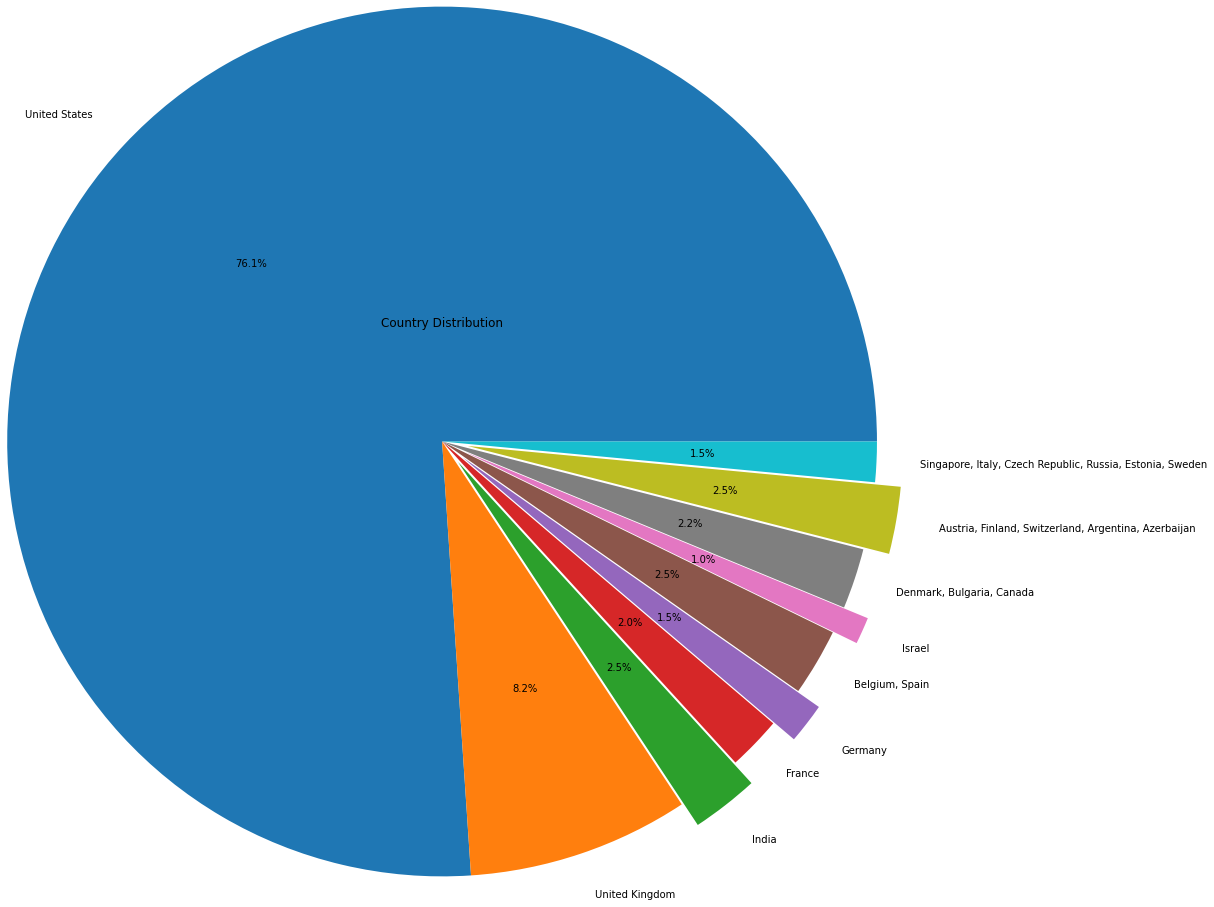

In [38]:
#                       pie plot                              #
data = {
    'United States': 305,
    'United Kingdom': 33,
    'India': 10,
    'France': 8,
    'Germany': 6,
    'Belgium, Spain': 10,
    'Israel': 4,
    'Denmark, Bulgaria, Canada': 9,
    'Austria, Finland, Switzerland, Argentina, Azerbaijan': 10,
    'Singapore, Italy, Czech Republic, Russia, Estonia, Sweden': 6
}

# Creating a pie chart
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%',radius=5,explode = [0.0,0.0,0.3,0.0,0.3,0.0,0.3,0.0,0.3,0.0])
plt.title('Country Distribution')
plt.show()

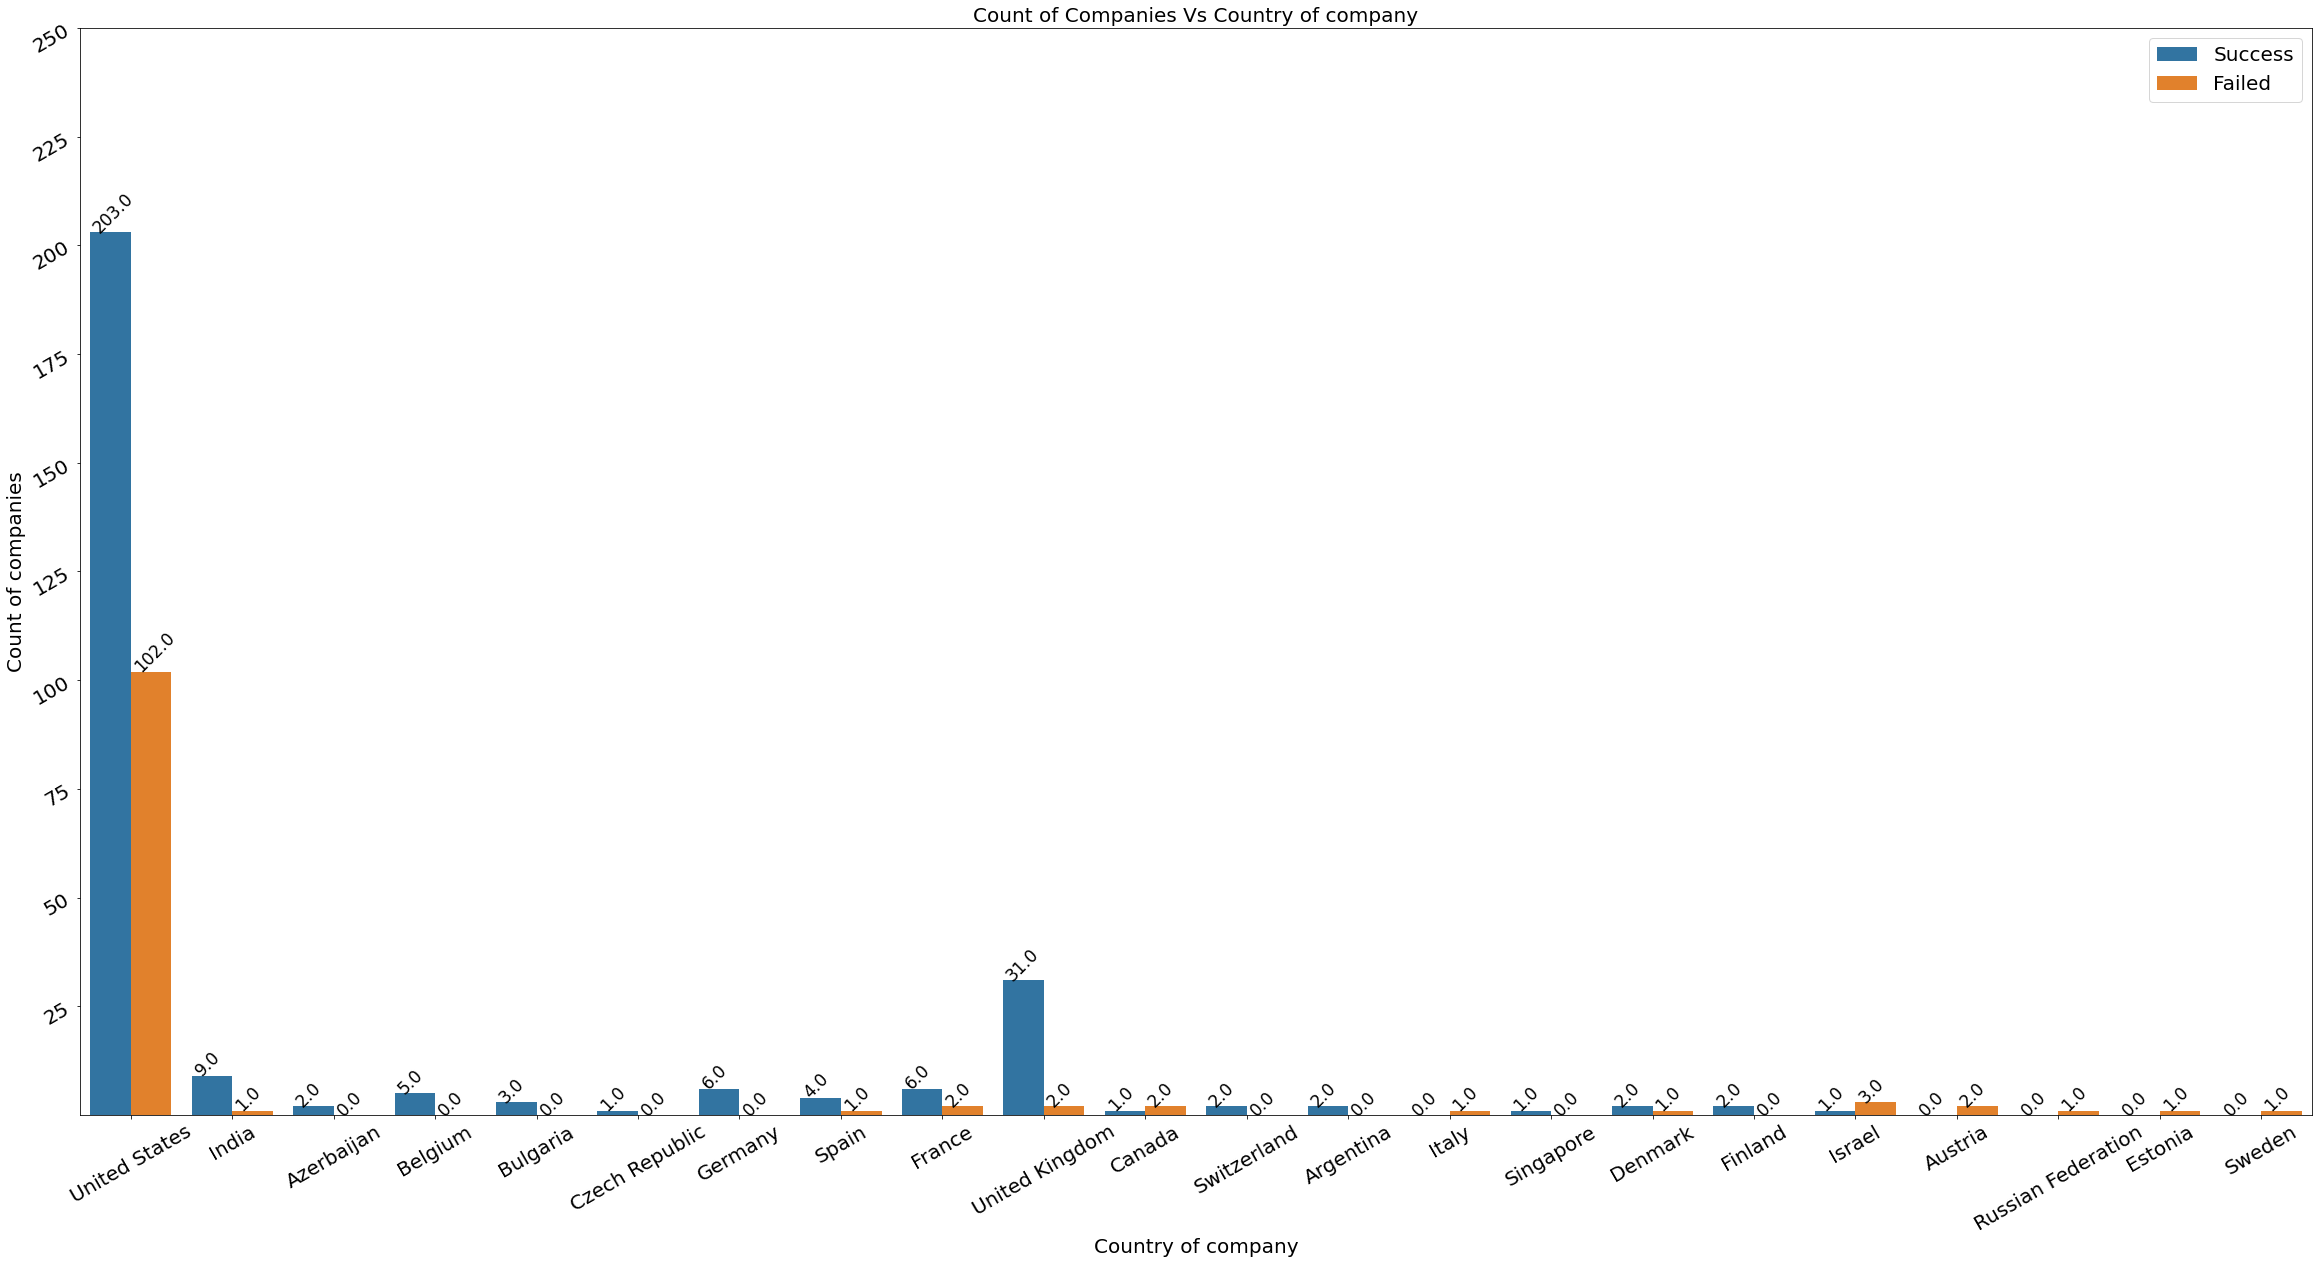

In [43]:
# Plot a count plot to see success and failure country wise
plt.figure(figsize=(40,20))
ax=sns.countplot(x=df["Country of company"].dropna(),hue=df["Dependent-Company Status"])
plt.title("Count of Companies Vs Country of company",fontsize=20)
plt.ylabel("Count of companies", fontsize=20)
plt.yticks(rotation=30, fontsize=20)
plt.xticks(rotation=30, fontsize=20)
plt.xlabel("Country of company", fontsize=20) 
ax.set_ylim([0, 250])
ax.set_yticks([25,50,75,100,125,150,175,200,225,250])
# create a list to collect the plt.patches data
for i in ax.patches:
    ax.text(i.get_x(),i.get_height(),str(round((i.get_height()), 2)), fontsize=17, color='Black',rotation=45)
ax.legend(fontsize=20)    
plt.show()



In [15]:
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt

Analysis of the above results:

The data contains more than 75% of U.S. based startups.
Although, there is 100% success rate as evident from the previous slide for countries like South America it only has 2 startups.
Country/ geographical location cannot be used as a valid attribute that could estimate the success of a startup based on this dataset.
